In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sb
import pickle
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.base import clone
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import itertools
from MiscFuncs import *

from MLfuncs import *
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

In [2]:
path_x = r'C:\Users\Adamin\Documents\Alpha'
path = r'/vol/sci/astro/bigdata/tussbaum/halofinder/catalog/'
path_1 = r'/vol/sci/astro/home/adambeilialpha/'

sgal_qlabel_0 = pd.read_pickle(path_1 + r'/sgal_qlabel_0_backup.pkl')
sgal_qlabel_1 = pd.read_pickle(path_1 + r'/sgal_qlabel_1_backup.pkl')
sgal_qlabel_2 = pd.read_pickle(path_1 + r'/sgal_qlabel_2.pkl')
sgal_qlabel_3 = pd.read_pickle(path_1 + r'/sgal_qlabel_3.pkl')
sgal_qlabel_4 = pd.read_pickle(path_1 + r'/sgal_qlabel_4.pkl')
#sgal_qlabel_5 = pd.read_pickle(path_1 + r'/sgal_qlabel_5.pkl')
sgal_qlabel_6 = pd.read_pickle(path_1 + r'/sgal_qlabel_6.pkl')

sgal_qlabel_118_596 = pd.read_pickle(path_1 + r'/sgal_qlabel.pkl')

#sgal_forces = pd.DataFrame(index=sgal_qlabel_0.index)
#sgal_forces[['Fgrav','Pgrav','Ptidal','gas_phase_metallicity(disc)[log(O/H)+12]']]=sgal_qlabel_118_596[['Fgrav','Pgrav','Ptidal','gas_phase_metallicity(disc)[log(O/H)+12]']]
sgal_qlabel_all = pd.concat([sgal_qlabel_0, sgal_qlabel_1,sgal_qlabel_2, sgal_qlabel_3,sgal_qlabel_4,sgal_qlabel_6], axis=1)
feature_list = sgal_qlabel_all.keys().values.tolist()

#sgal_expanded_lvl_1 = pd.read_pickle(path_1 + r'/sgal_expanded_lvl_2.pkl')
#sgal_expanded_lvl_1 = sgal_expanded_lvl_1[feature_list]
#sgal_expanded_lvl_3 = pd.read_pickle(path_1 + r'/sgal_expanded_lvl_1.pkl')
#sgal_expanded_lvl_3 = sgal_expanded_lvl_3[feature_list]
sgal_expanded_3_lvls = pd.read_pickle(path_1 + r'/sgal_expanded_3_lvls.pkl')

# RFC on RvirEnteringOutside Data

In [ ]:
# The RFC is: clf = RandomForestClassifier(n_estimators= 100,max_features=3,bootstrap=True, criterion='gini',verbose=1,n_jobs=-1)

In [3]:
sgal_qlabel_surv = sgal_qlabel_all.loc[sgal_qlabel_all['qlabel']!=0]
sgal_qlabel_surv = sgal_qlabel_surv.loc[sgal_qlabel_surv['qlabel']!=3]

selected_features = ['Rsat[kpc]','Mcg(R0.5kpc)[Msun]', 'Msat/Mrvir',
 'gas_c_vec*stars_AM(0.9coldgas)', 'Eccentricity(Rperi_1,Rapo_1)','qlabel',
 'EllipsArea_stars(Rsat)_rvir']
sgal_RFC_features = sgal_qlabel_surv[selected_features]
#sgal_RFC_features = sgal_RFC_features.fillna(1.)]
sgal_RFC_features = sgal_RFC_features.replace([np.inf, -np.inf], np.nan).dropna()

In [4]:
a=sgal_RFC_features['qlabel']==1
sgal_RFC_features['qlabel'][a] = 0
b=sgal_RFC_features['qlabel']==4
#sgal_qlabel_surv.loc['qlabel(1|4)'][]
sgal_RFC_features['qlabel'][b] = 1
labels = np.array(sgal_RFC_features.pop('qlabel'))
num = np.random.randint(50)
num=38
X_train, X_test, y_train, y_test = train_test_split(sgal_RFC_features.reset_index().drop(['tgid'],axis=1),
                                         labels, 
                                         stratify = labels,
                                         test_size = 0.27, 
                                         random_state = num)
features = list(X_train.columns)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        18
         4.0       1.00      1.00      1.00         4

   micro avg       1.00      1.00      1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22

Confusion matrix, without normalization
[[18  0]
 [ 0  4]]
(set(['Recall']), 'Baseline:', set([1.0]), 'Test: ', set([1.0]), 'Train:', set([1.0]))
(set(['Precision']), 'Baseline:', set([0.82]), 'Test: ', set([1.0]), 'Train:', set([1.0]))
(set(['Roc']), 'Baseline:', set([0.5]), 'Test: ', set([1.0]), 'Train:', set([1.0]))
[ 1.  1.  4.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  4.  1.  4.  1.
  4.  1.  1.  1.]


ValueError: Data is not binary and pos_label is not specified

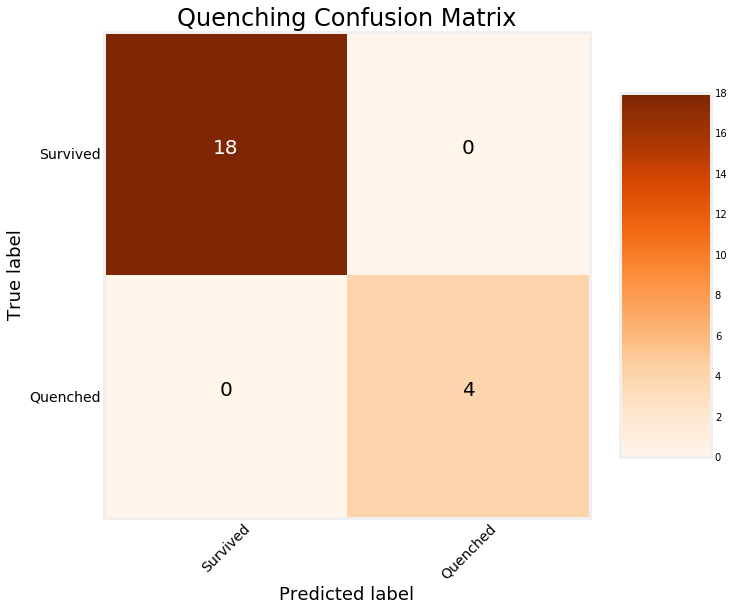

In [5]:
RFC(X_train, X_test, y_train, y_test,features)

# RFC on Expanded Data

6


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95        52
         1.0       0.82      0.75      0.78        12

   micro avg       0.92      0.92      0.92        64
   macro avg       0.88      0.86      0.87        64
weighted avg       0.92      0.92      0.92        64

Confusion matrix, without normalization
[[50  2]
 [ 3  9]]
(set(['Recall']), 'Baseline:', set([1.0]), 'Test: ', set([0.75]), 'Train:', set([1.0]))
(set(['Precision']), 'Baseline:', set([0.19]), 'Test: ', set([0.82]), 'Train:', set([1.0]))
(set(['Roc']), 'Baseline:', set([0.5]), 'Test: ', set([0.98]), 'Train:', set([1.0]))
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  1.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  0.  0.  0.
  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.]


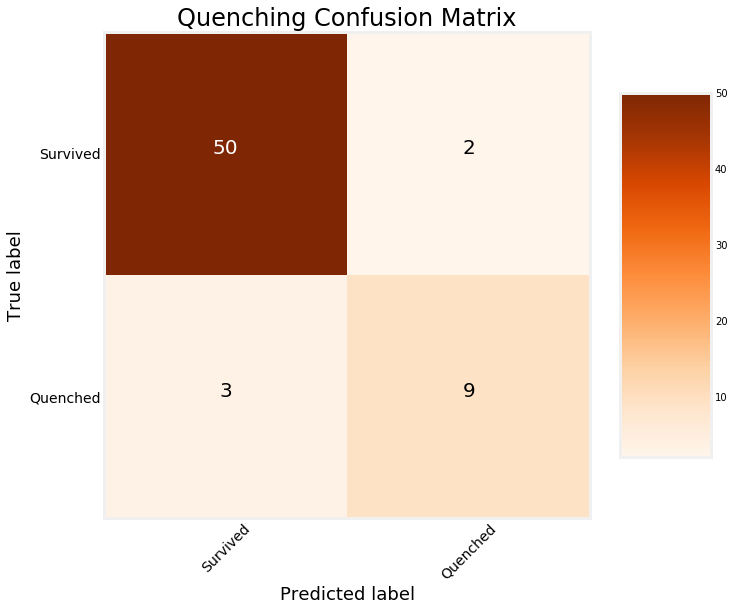

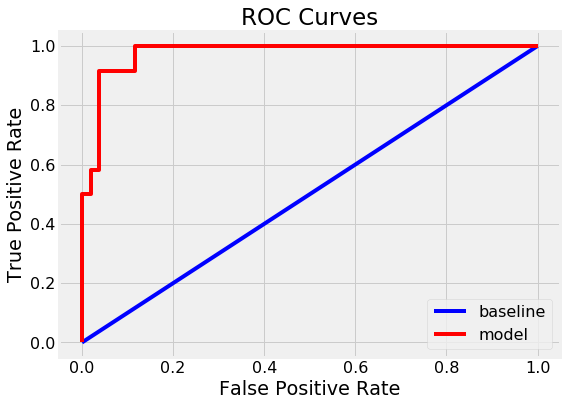

In [6]:
sgal_qlabel_surv = sgal_expanded_3_lvls.loc[sgal_expanded_3_lvls['qlabel']!=0]
sgal_qlabel_surv = sgal_qlabel_surv.loc[sgal_qlabel_surv['qlabel']!=3]

selected_features = ['Rsat[kpc]','Mcg(R0.5kpc)[Msun]', 'Msat/Mrvir',
 'gas_c_vec*stars_AM(0.9coldgas)', 'Eccentricity(Rperi_1,Rapo_1)','qlabel',
 'EllipsArea_stars(Rsat)_rvir']
sgal_RFC_features = sgal_qlabel_surv[selected_features]
#sgal_RFC_features = sgal_RFC_features.fillna(1.)]
sgal_RFC_features = sgal_RFC_features.replace([np.inf, -np.inf], np.nan).dropna()
a=sgal_RFC_features['qlabel']==1
sgal_RFC_features['qlabel'][a] = 0
b=sgal_RFC_features['qlabel']==4
#sgal_qlabel_surv.loc['qlabel(1|4)'][]
sgal_RFC_features['qlabel'][b] = 1
labels = np.array(sgal_RFC_features.pop('qlabel'))
num = np.random.randint(50)
print num
X_train, X_test, y_train, y_test = train_test_split(sgal_RFC_features.reset_index().drop(['tgid'],axis=1),
                                         labels, 
                                         stratify = labels,
                                         test_size = 0.27, 
                                         random_state = num)
features = list(X_train.columns)
RFC(X_train, X_test, y_train, y_test,features)